In [1]:

# Imports
import numpy as np
import matplotlib.pyplot as plt
from monai.transforms import Compose, LoadImaged
import glob
import os
from monai.data import Dataset, DataLoader

2024-06-26 14:59:54.497410: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-26 14:59:54.693669: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-26 14:59:54.693736: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-26 14:59:54.695477: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-26 14:59:54.708655: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructio

In [2]:
data_dir ='../MMWHS/CT_withGT_proc/'
# data_dir ='../MMWHS/MR_withGT_proc/'

all_images = sorted(glob.glob(os.path.join(data_dir, "images/case_*/*.nii.gz")))
all_labels = sorted(glob.glob(os.path.join(data_dir, "labels/case_*/*.nii.gz")))

example_dataset = [{"image": img, "label": seg} for img, seg in zip(all_images, all_labels)]

print(len(example_dataset))


320


In [5]:
transforms = Compose([
    LoadImaged(keys=["image", "label"], image_only=False)
    ])

In [6]:
example_patch_ds = Dataset(data=example_dataset, transform=transforms)
patch_data_loader = DataLoader(example_patch_ds, batch_size=1, shuffle=True)

<Figure size 640x480 with 0 Axes>

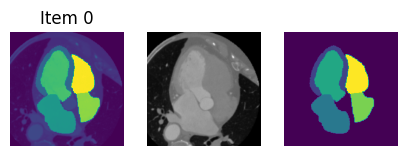

<Figure size 640x480 with 0 Axes>

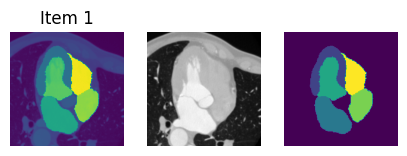

<Figure size 640x480 with 0 Axes>

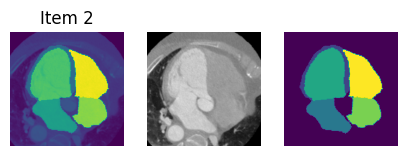

<Figure size 640x480 with 0 Axes>

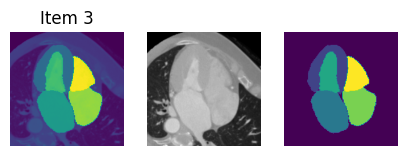

<Figure size 640x480 with 0 Axes>

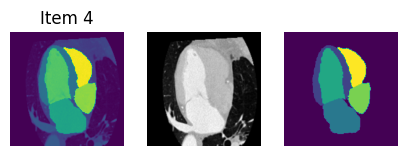

In [7]:
i=0

for batch in patch_data_loader:
    fig = plt.figure("visualize")
    image, label = batch["image"][0], batch["label"][0]
    plt.figure(figsize=(5, 2.5))
    plt.subplot(1, 3, 1)
    plt.title(f"Item {i}")
    plt.axis("off")
    plt.imshow((image.squeeze() + label.squeeze()/2) / 2)
    plt.subplot(1, 3, 2)
    plt.axis("off")
    plt.imshow(image.squeeze(), cmap="gray")
    plt.subplot(1, 3, 3)
    plt.axis("off")
    plt.imshow(label.squeeze())
    plt.show()
    
    i += 1
    if i == 5:
        break
    

In [8]:
example_patch_ds = Dataset(data=example_dataset, transform=transforms)
patch_data_loader = DataLoader(example_patch_ds, batch_size=3, shuffle=True)

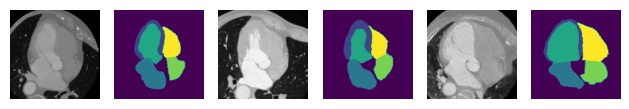

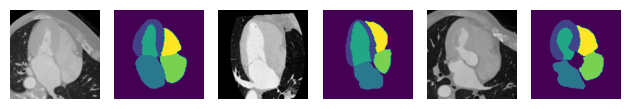

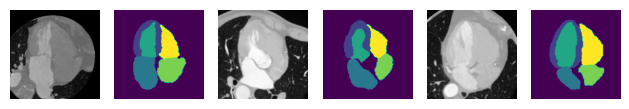

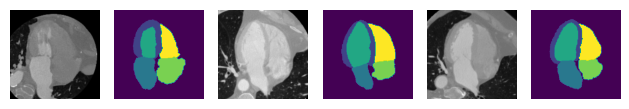

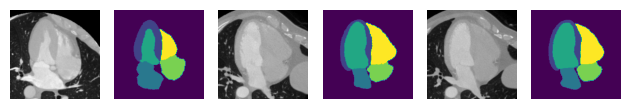

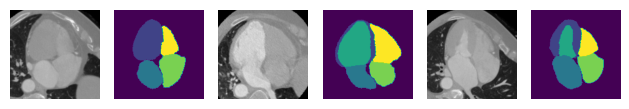

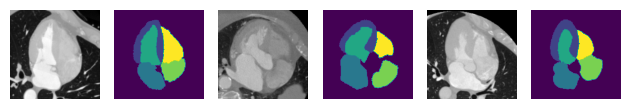

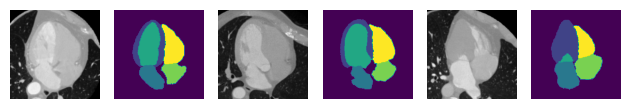

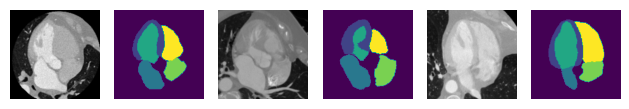

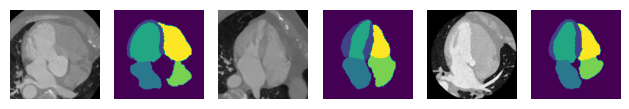

In [9]:
i=0

for batch in patch_data_loader:
    plt.figure()
    plt.subplot(1, 6, 1)
    plt.axis("off")
    plt.imshow(batch["image"][0].squeeze(0), cmap="gray")
    plt.subplot(1, 6, 2)
    plt.axis("off")
    plt.imshow(batch["label"][0].squeeze(0))
    plt.subplot(1, 6, 3)
    plt.axis("off")
    plt.imshow(batch["image"][1].squeeze(0), cmap="gray")
    plt.subplot(1, 6, 4)
    plt.axis("off")
    plt.imshow(batch["label"][1].squeeze(0))
    plt.subplot(1, 6, 5)
    plt.axis("off")
    plt.imshow(batch["image"][2].squeeze(0), cmap="gray")
    plt.subplot(1, 6, 6)
    plt.axis("off")
    plt.imshow(batch["label"][2].squeeze(0))
    
    plt.tight_layout()
    plt.show()

    i += 1
    if i == 10:
        break

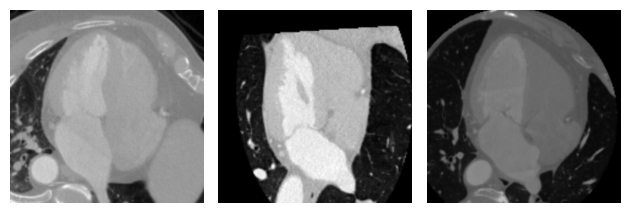

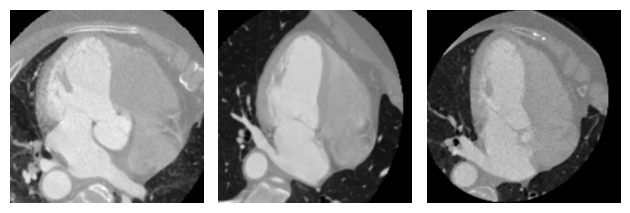

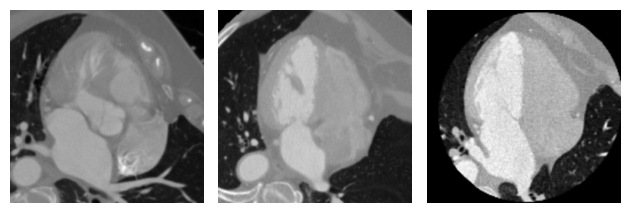

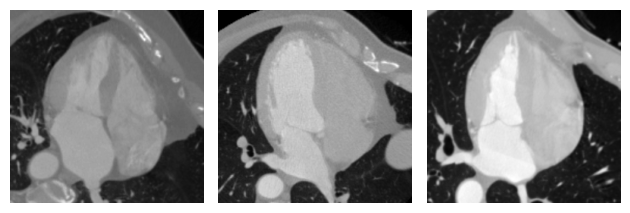

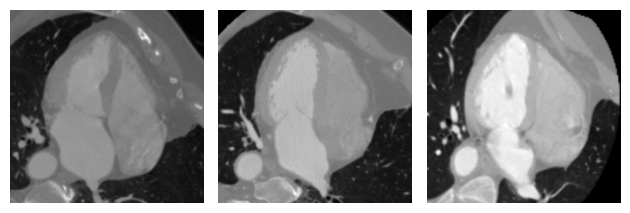

In [10]:
i=0

for batch in patch_data_loader:
    fig = plt.figure("visualize")
    plt.subplot(1, 3, 1)
    plt.axis("off")
    plt.imshow(batch["image"][0].squeeze(0), cmap="gray")
    plt.subplot(1, 3, 2)
    plt.axis("off")
    plt.imshow(batch["image"][1].squeeze(0), cmap="gray")
    plt.subplot(1, 3, 3)
    plt.axis("off")
    plt.imshow(batch["image"][2].squeeze(0), cmap="gray")
    plt.tight_layout() 
    plt.show()

    i += 1
    if i == 5:
        break
    
    
    